   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

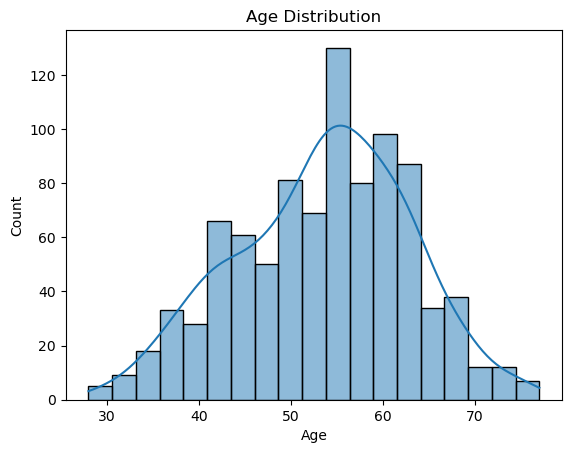

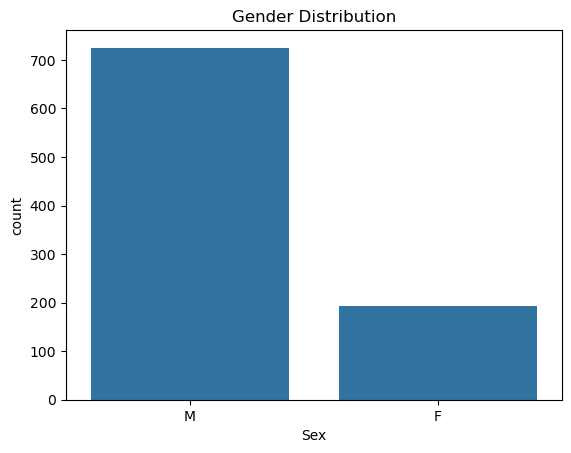

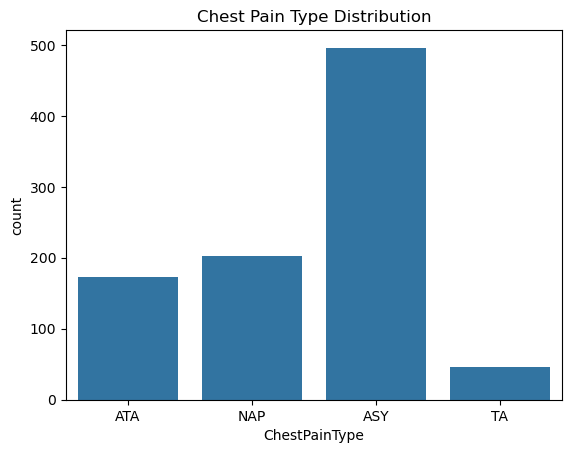

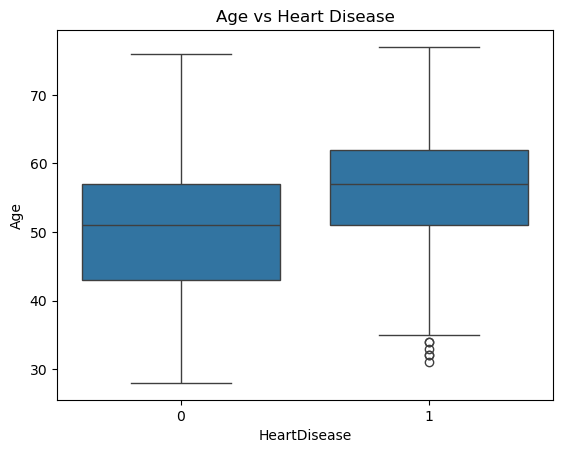

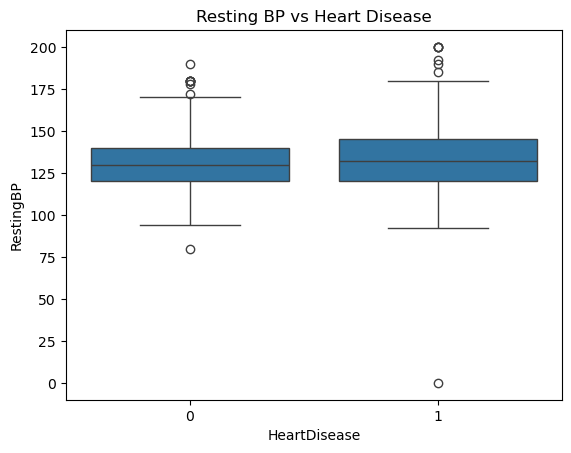

Accuracy: 0.8478260869565217
Confusion Matrix:
 [[66 11]
 [17 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to CSV file
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"

# Read CSV file into Pandas DF 
df = pd.read_csv(file_path)

# Basic info and overview (first 5 rows, summary, descriptive stats, missing values check)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# plot features to see distribition 
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='ChestPainType', data=df)
plt.title('Chest Pain Type Distribution')
plt.show()

sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Resting BP vs Heart Disease')
plt.show()

# Data preprocessing
# Encode 'Sex' ('M'->1, 'F'->0)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# Encode 'ExerciseAngina' ('Y'->1, 'N'->0)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Encode 'ChestPainType' into multiple columns
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

# Encode 'RestingECG' ('Normal'->0, 'ST'->1, 'LVH'->2)
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})

# Encode 'ST_Slope' ('Up'->0, 'Flat'->1, 'Down'->2)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# All columns are considered features. Every predictor in dataset is used. 
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Feature Coefficients and Their Contribution to the Model:

              Feature  Coefficient
9            ST_Slope     1.543806
10  ChestPainType_ATA    -1.399332
11  ChestPainType_NAP    -1.245506
7      ExerciseAngina     1.148843
1                 Sex     1.045751
4           FastingBS     0.834791
12   ChestPainType_TA    -0.811698
8             Oldpeak     0.417832
5          RestingECG     0.053170
0                 Age     0.012248
6               MaxHR    -0.008139
3         Cholesterol    -0.004029
2           RestingBP     0.001733


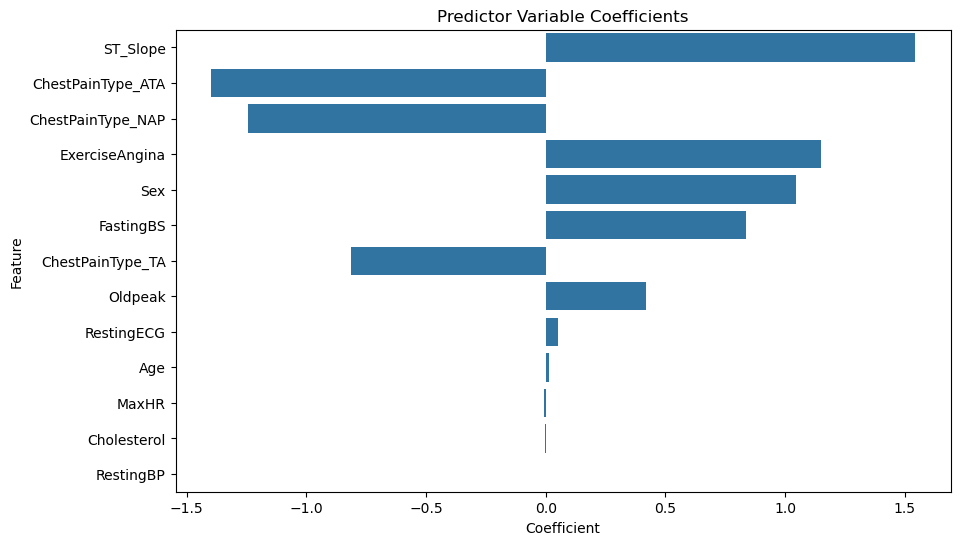

In [19]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get the coefficients (for the logistic regression model)
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by coefficient value 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("Feature Coefficients and Their Contribution to the Model:\n")
print(coef_df[['Feature', 'Coefficient']])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Predictor Variable Coefficients')
plt.show()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Path to CSV file
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"

# Read CSV file into Pandas DF 
df = pd.read_csv(file_path)

# Data preprocessing
# Encode 'Sex' ('M'->1, 'F'->0)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# Encode 'ExerciseAngina' ('Y'->1, 'N'->0)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Encode 'ChestPainType' into multiple columns
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

# Encode 'RestingECG' ('Normal'->0, 'ST'->1, 'LVH'->2)
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})

# Encode 'ST_Slope' ('Up'->0, 'Flat'->1, 'Down'->2)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Define X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [1000, 2000, 3000],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)




Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.8804347826086957
Confusion Matrix:
 [[68 14]
 [ 8 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Optimal parameters: 
C: 0.1 (inverse of regularization strength)
max_iter: 1000 (maximum number of iterations)
solver: 'lbfgs' (algorithm to use in the optimization problem)
These are the optimal hyperparameters found by GridSearchCV for the Logistic Regression model.

Accuracy: 0.8804 (88.04%)
The model correctly predicted the heart disease status for about 88% of the samples in the test set. 

Confusion Matrix:
[[68 14]
 [ 8 94]]

True Negatives (TN): 68 (correctly predicted no heart disease)
False Positives (FP): 14 (incorrectly predicted heart disease)
False Negatives (FN): 8 (incorrectly predicted no heart disease)
True Positives (TP): 94 (correctly predicted heart disease)

Classification Report:
For class 0 (No Heart Disease):
Precision: 0.89 (89% of predicted negatives are correct)
Recall: 0.83 (83% of actual negatives were identified)
F1-score: 0.86 

For class 1 (Heart Disease):
Precision: 0.87 (87% of predicted positives are correct)
Recall: 0.92 (92% of actual positives were identified)
F1-score: 0.90 

Overall:
Accuracy: 0.88 (88% overall correct predictions)
Macro avg: 0.88 (unweighted mean of per-class scores)
Weighted avg: 0.88 (weighted mean of per-class scores)


Feature Coefficients and Their Contribution to the Model:

              Feature  Coefficient  AbsCoefficient
9            ST_Slope     0.981649        0.981649
11  ChestPainType_NAP    -0.601644        0.601644
10  ChestPainType_ATA    -0.585600        0.585600
7      ExerciseAngina     0.485806        0.485806
3         Cholesterol    -0.387876        0.387876
1                 Sex     0.381327        0.381327
4           FastingBS     0.355968        0.355968
12   ChestPainType_TA    -0.249424        0.249424
6               MaxHR    -0.238199        0.238199
8             Oldpeak     0.230227        0.230227
5          RestingECG     0.106335        0.106335
2           RestingBP     0.051775        0.051775
0                 Age     0.028022        0.028022


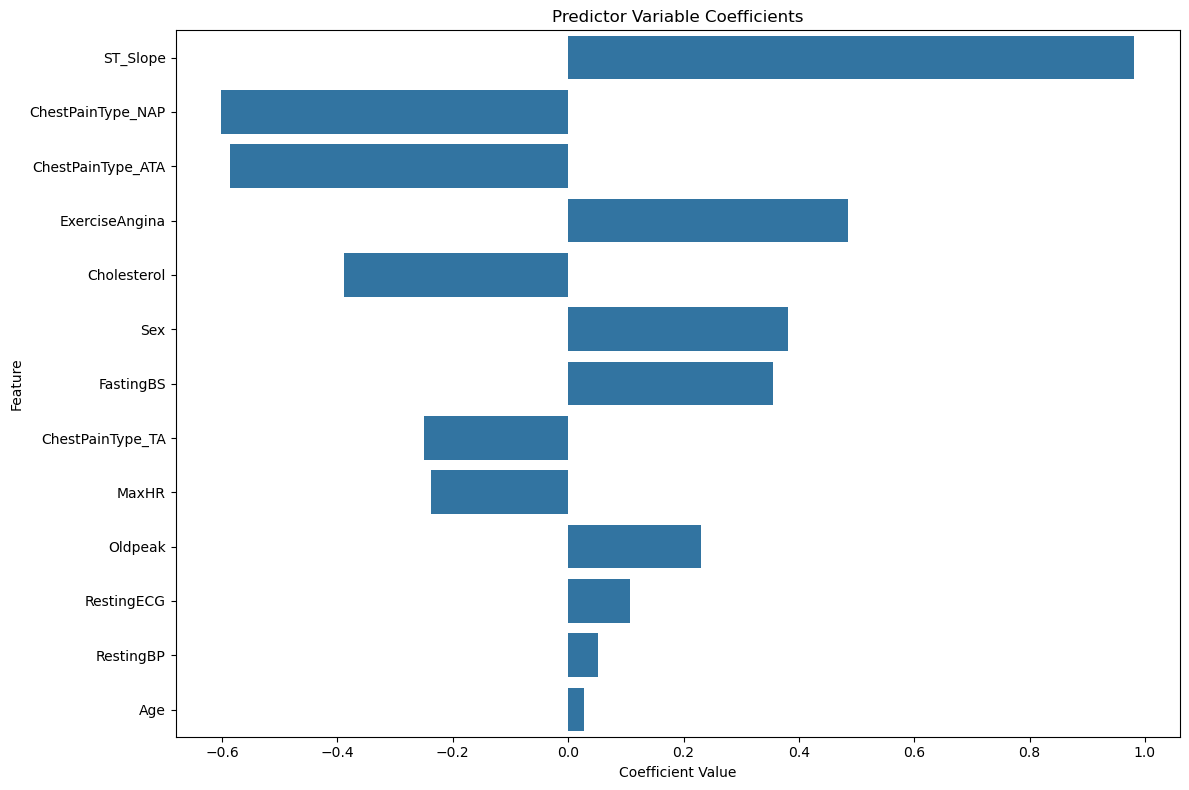

In [21]:
# Get feature names
feature_names = X.columns

# Get the coefficients (for the logistic regression model)
coefficients = best_model.named_steps['classifier'].coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("\nFeature Coefficients and Their Contribution to the Model:\n")
print(coef_df)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Predictor Variable Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [22]:
import sys
!{sys.executable} -m pip install dash

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [23]:
# Load and preprocess data (use the same preprocessing steps as before)
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"
df = pd.read_csv(file_path)

# Data preprocessing (same as before)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Define X and y, excluding 'Age', 'RestingBP', and 'RestingECG'
X = df.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG'], axis=1)
y = df['HeartDisease']

# Feature scaling and model training (same as before)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([('classifier', LogisticRegression(random_state=42))])
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [1000, 2000, 3000],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Get feature importance
feature_names = X.columns
coefficients = best_model.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Heart Disease Prediction Model: Feature Importance'),
    dcc.Graph(id='feature-importance-graph'),
    html.P('Select number of top features to display:'),
    dcc.Slider(
        id='num-features-slider',
        min=5,
        max=len(coef_df),
        step=1,
        value=10,
        marks={i: str(i) for i in range(5, len(coef_df)+1, 5)}
    )
])

# Define the callback to update the graph
@app.callback(
    Output('feature-importance-graph', 'figure'),
    Input('num-features-slider', 'value')
)
def update_graph(num_features):
    df_subset = coef_df.head(num_features)
    fig = px.bar(df_subset, x='Feature')



In [24]:
# Exclude RestingECG/BP 
# Path to CSV file
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"

# Read CSV file into Pandas DF 
df = pd.read_csv(file_path)

# Data preprocessing
# Encode 'Sex' ('M'->1, 'F'->0)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# Encode 'ExerciseAngina' ('Y'->1, 'N'->0)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Encode 'ChestPainType' into multiple columns
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

# Encode 'ST_Slope' ('Up'->0, 'Flat'->1, 'Down'->2)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Define X and y, excluding 'Age', 'RestingBP', and 'RestingECG'
X = df.drop(['HeartDisease', 'Age', 'RestingBP', 'RestingECG'], axis=1)
y = df['HeartDisease']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [1000, 2000, 3000],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get feature names
feature_names = X.columns

# Get the coefficients (for the logistic regression model)
coefficients = best_model.named_steps['classifier'].coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)



Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.8695652173913043
Confusion Matrix:
 [[67 15]
 [ 9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

